In [9]:
import numpy as np

class Perceptron:
    def __init__(self, num_inputs, weights):
        self.weights = np.array(weights)
        self.num_inputs = num_inputs

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return 1 if summation > 0 else 0

# Define weights for AND gate
and_weights = [-0.8, 0.5, 0.5]

# Define weights for OR gate
or_weights = [-0.3, 0.5, 0.5]

# Define input data for AND gate
input_data_and = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])

# Define input data for OR gate
input_data_or = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])

# Create AND perceptron
and_perceptron = Perceptron(2, and_weights)

# Create OR perceptron
or_perceptron = Perceptron(2, or_weights)

# Test AND gate
print("AND Gate:")
for inputs in input_data_and:
    output = and_perceptron.predict(inputs)
    print(f"{inputs[0]} AND {inputs[1]} = {output}")

# Test OR gate
print("\nOR Gate:")
for inputs in input_data_or:
    output = or_perceptron.predict(inputs)
    print(f"{inputs[0]} OR {inputs[1]} = {output}")


AND Gate:
1 AND 1 = 1
1 AND 0 = 0
0 AND 1 = 0
0 AND 0 = 0

OR Gate:
1 OR 1 = 1
1 OR 0 = 1
0 OR 1 = 1
0 OR 0 = 0


Original Dataset:
   race_id  horse_id  1-101  1-102  1-103  1-104  1-105  1-106  1-107  1-108  \
0   495886    565129    NaN    NaN    NaN    NaN    NaN    NaN    NaN  -0.71   
1   495886    607093    NaN    NaN    NaN    NaN    NaN    NaN    NaN  -0.05   
2   495886    637337    NaN    NaN    NaN    NaN    NaN    NaN    NaN  -0.97   
3   495886    659819    NaN    NaN    NaN    NaN    NaN    NaN    NaN   0.21   
4   495886    661530    NaN    NaN    NaN    NaN    NaN    NaN    NaN   0.08   

   ...  3-132  4-105  4-109  4-110  4-114  4-115  4-116  4-117  calc_position  \
0  ...  -1.16    0.0   1.87   1.87  -2.07  -1.96  -1.95  -0.30            8.0   
1  ...   0.77    0.0   0.00   0.00   0.00   0.00   0.00   0.07            5.0   
2  ...  -1.16    0.0   0.00   0.00   0.48   0.44   0.39  -0.86            7.0   
3  ...   0.77    0.0   0.00   0.00   0.32   1.09   0.78  -0.86            1.0   
4  ...   0.77    0.0   0.00   0.00   0.00   0.00   0.39   1.17            4.0   

   price  
0  

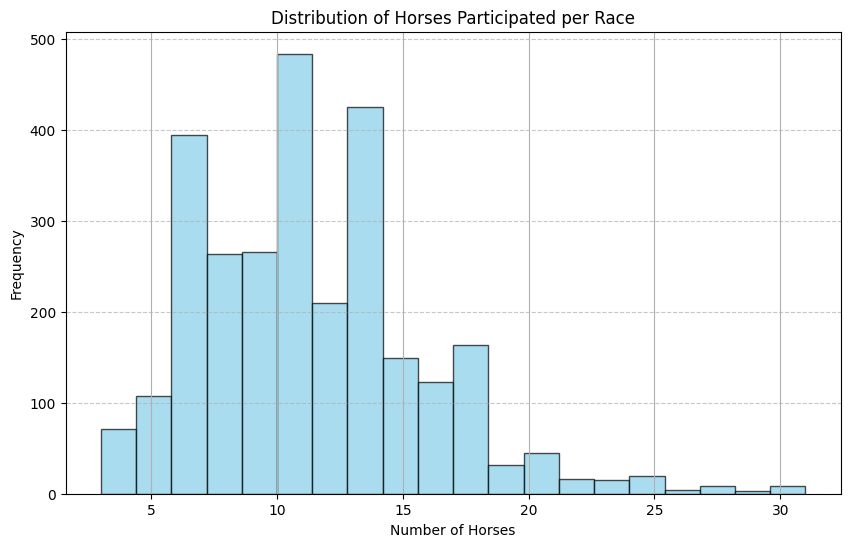


Number of races each horse participated in:
horse_id
35519      3
50971      2
300119     5
300326     3
301317     1
          ..
1757343    1
1757346    1
1758858    1
1758859    1
2248560    1
Name: race_id, Length: 20614, dtype: int64


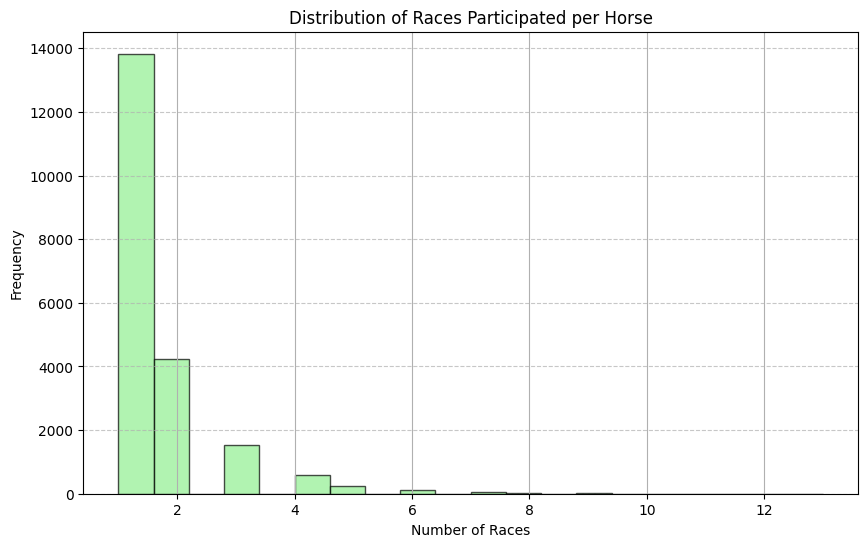


What is wrong with dataset, how to solve it?
Issue with Dataset:
The dataset presents a notable challenge due to the high prevalence 
of missing values and null entries, which can complicate analysis and
modeling efforts, potentially leading to less effective outcomes. 
However, a positive aspect of the dataset is the absence or minimal
presence of outliers. This is advantageous as it helps maintain data integrity
and ensures the reliability of the analysis results.
Solution:
Skip rows with more null values than average.
Replace remaining missing values with 0.
Reduces dataset size from 100,000 to 31,750 rows.
Maintains data integrity and reliability.

Updated DataFrame with one-hot encoding for Race ID and Horse ID:
    1-101  1-102  1-103  1-104  1-105  1-106  1-107  1-108  1-109  1-110  ...  \
19   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.88  -0.36  -0.53  ...   
20   0.00   0.00   0.00   0.00   0.00   0.00   0.00  -0.65  -0.11  -0.05  ...   
21   0.00   0.00   0.00   0.0

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = 'horseRacing.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Original Dataset:")
print(df.head())

# Basic cleaning
# Remove duplicates
df = df.drop_duplicates()

# Calculate the number of consecutive null values in each row
null_blocks = df.isnull().astype(int).groupby((df.notnull() != df.shift().notnull()).any(axis=1).cumsum()).cumsum(axis=1)

# Calculate the average number of null blocks across all rows
avg_null_blocks = null_blocks.mean().mean()  # Convert to integer
avg_null_blocks = int(avg_null_blocks)

# Filter out rows with more null values than the average
df_filtered = df[df.isnull().sum(axis=1) <= avg_null_blocks]

# Select 40k rows if available
if len(df_filtered) >= 40000:
    df_filtered = df_filtered.sample(n=40000, random_state=1)

# Display remaining count of rows
remaining_count = len(df_filtered)
print("Remaining count of rows after filtering:", remaining_count)

# Assigning filtered data frame to the df.
df = df_filtered;

# Handling missing values
# Replace NaN values with a specific value or use imputation techniques
# For example, df = df.fillna(0) to replace NaN with 0
df = df.fillna(0)

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check for duplicates again
print("\nDuplicates after cleaning:", df.duplicated().sum())

# Display the cleaned dataset
print("\nCleaned Dataset:")
print(df.head())

# Convert labels into 0 or 1
# Considering 1, 2, 3 positions are of winner horses
# Add 'Result' column based on the conditions
df['Result'] = np.where(df['calc_position'].isin([1, 2, 3]), 'isWinner', 'isLoser')

# Convert labels to integers
df['Result'] = df['Result'].map({'isWinner': 1, 'isLoser': 0})

# Display the updated DataFrame
print("\nUpdated DataFrame with 'Result' column:")
print(df.head())

# Display the number of horses participated per race
horses_per_race = df.groupby('race_id')['horse_id'].nunique()
print("Number of horses participated per race:")
print(horses_per_race)

# Plotting the distribution of horses participated per race
plt.figure(figsize=(10, 6))
horses_per_race.hist(bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Horses Participated per Race')
plt.xlabel('Number of Horses')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display the number of races each horse participated in
races_per_horse = df.groupby('horse_id')['race_id'].nunique()
print("\nNumber of races each horse participated in:")
print(races_per_horse)

# Plotting the distribution of races each horse participated in
plt.figure(figsize=(10, 6))
races_per_horse.hist(bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Distribution of Races Participated per Horse')
plt.xlabel('Number of Races')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print();
print("What is wrong with dataset, how to solve it?");
print("Issue with Dataset:")
print("The dataset presents a notable challenge due to the high prevalence ");
print("of missing values and null entries, which can complicate analysis and");
print("modeling efforts, potentially leading to less effective outcomes. ");
print("However, a positive aspect of the dataset is the absence or minimal");
print("presence of outliers. This is advantageous as it helps maintain data integrity");
print("and ensures the reliability of the analysis results.");
print("Solution:")
print("Skip rows with more null values than average.")
print("Replace remaining missing values with 0.")
print("Reduces dataset size from 100,000 to 31,750 rows.")
print("Maintains data integrity and reliability.")
print();

# Implement one-hot encoding on Race ID Column
race_one_hot = pd.get_dummies(df['race_id'], prefix='race')
df = pd.concat([df, race_one_hot], axis=1)
df.drop('race_id', axis=1, inplace=True)

# Implement one-hot encoding for Horse ID Column
horse_one_hot = pd.get_dummies(df['horse_id'], prefix='horse')
df = pd.concat([df, horse_one_hot], axis=1)
df.drop('horse_id', axis=1, inplace=True)

# Display the updated DataFrame
print("Updated DataFrame with one-hot encoding for Race ID and Horse ID:")
print(df.head())

# Sample a subset of the dataset (25%)
sampled_df = df.sample(frac=0.01, random_state=1)  # Sample 10% of the dataset

# Define features (X) and target variable (y)
X = sampled_df.drop('Result', axis=1)  # Features
y = sampled_df['Result']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize MLPClassifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=100, alpha=0.0001,
                               solver='adam', random_state=42)

# Train the classifier
mlp_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred = mlp_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

accuracy_percentage = accuracy * 100
print("Accuracy Percentage:", accuracy_percentage)